# DIVORCE PREDICTION

Study Group of Data

Of the participants, 84 (49%) were divorced and 86 (51%) were
married couples. There were 84 males (49%) and 86 females (51%) in the
study group. The ages of the participants ranged from 20 to 63 (X̄ = 36.04,
SD = 9.34). Although the study data were collected from seven different
regions of Turkey, the data were predominantly from the Black Sea region
(n=79). Of the participants, 74 (43.5%) were married for love, and 96
(56.5%) were married in an arranged marriage. While 127 (74.7%) of the
participants had children, 43 (25.3%) had no children. In addition, 18
(10.58%) of the participants were primary school graduate, 15 (8.8%) were
secondary school graduate, 33 (19.41%) were high school graduate, 88
(51.76%) were college graduate, and 15 (8.8%) had master's degree. The
monthly incomes of the participants were as follows: 34 (20%) individuals
had under 2000 TL, 54 (31.76%) had between 2001-3000 TL, 28 (16.47%)
had between 3001-4000 TL and 54 (31.76%) individuals had a monthly
income over 4000 TL.

In [1]:
import numpy as np
import pandas as pd
import shap
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
#%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

seed=5

# EDA

In [2]:
df = pd.read_csv('divorce.csv', delimiter=';')
reference = pd.read_csv('reference.tsv', delimiter='|')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
## Atr=Atribute
# Set atribute_id as index
reference.set_index('atribute_id', inplace=True)
reference

,description
atribute_id,
1,If one of us apologizes when our discussion de...
2,"I know we can ignore our differences, even if ..."
3,"When we need it, we can take our discussions w..."
4,"When I discuss with my spouse, to contact him ..."
5,The time I spent with my wife is special for us.
6,We don't have time at home as partners.
7,We are like two strangers who share the same e...
8,I enjoy our holidays with my wife.
9,I enjoy traveling with my wife.


In [4]:
# Check missing
df.isnull().sum().any()

False

Data is clean. No missing value found.

In [5]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


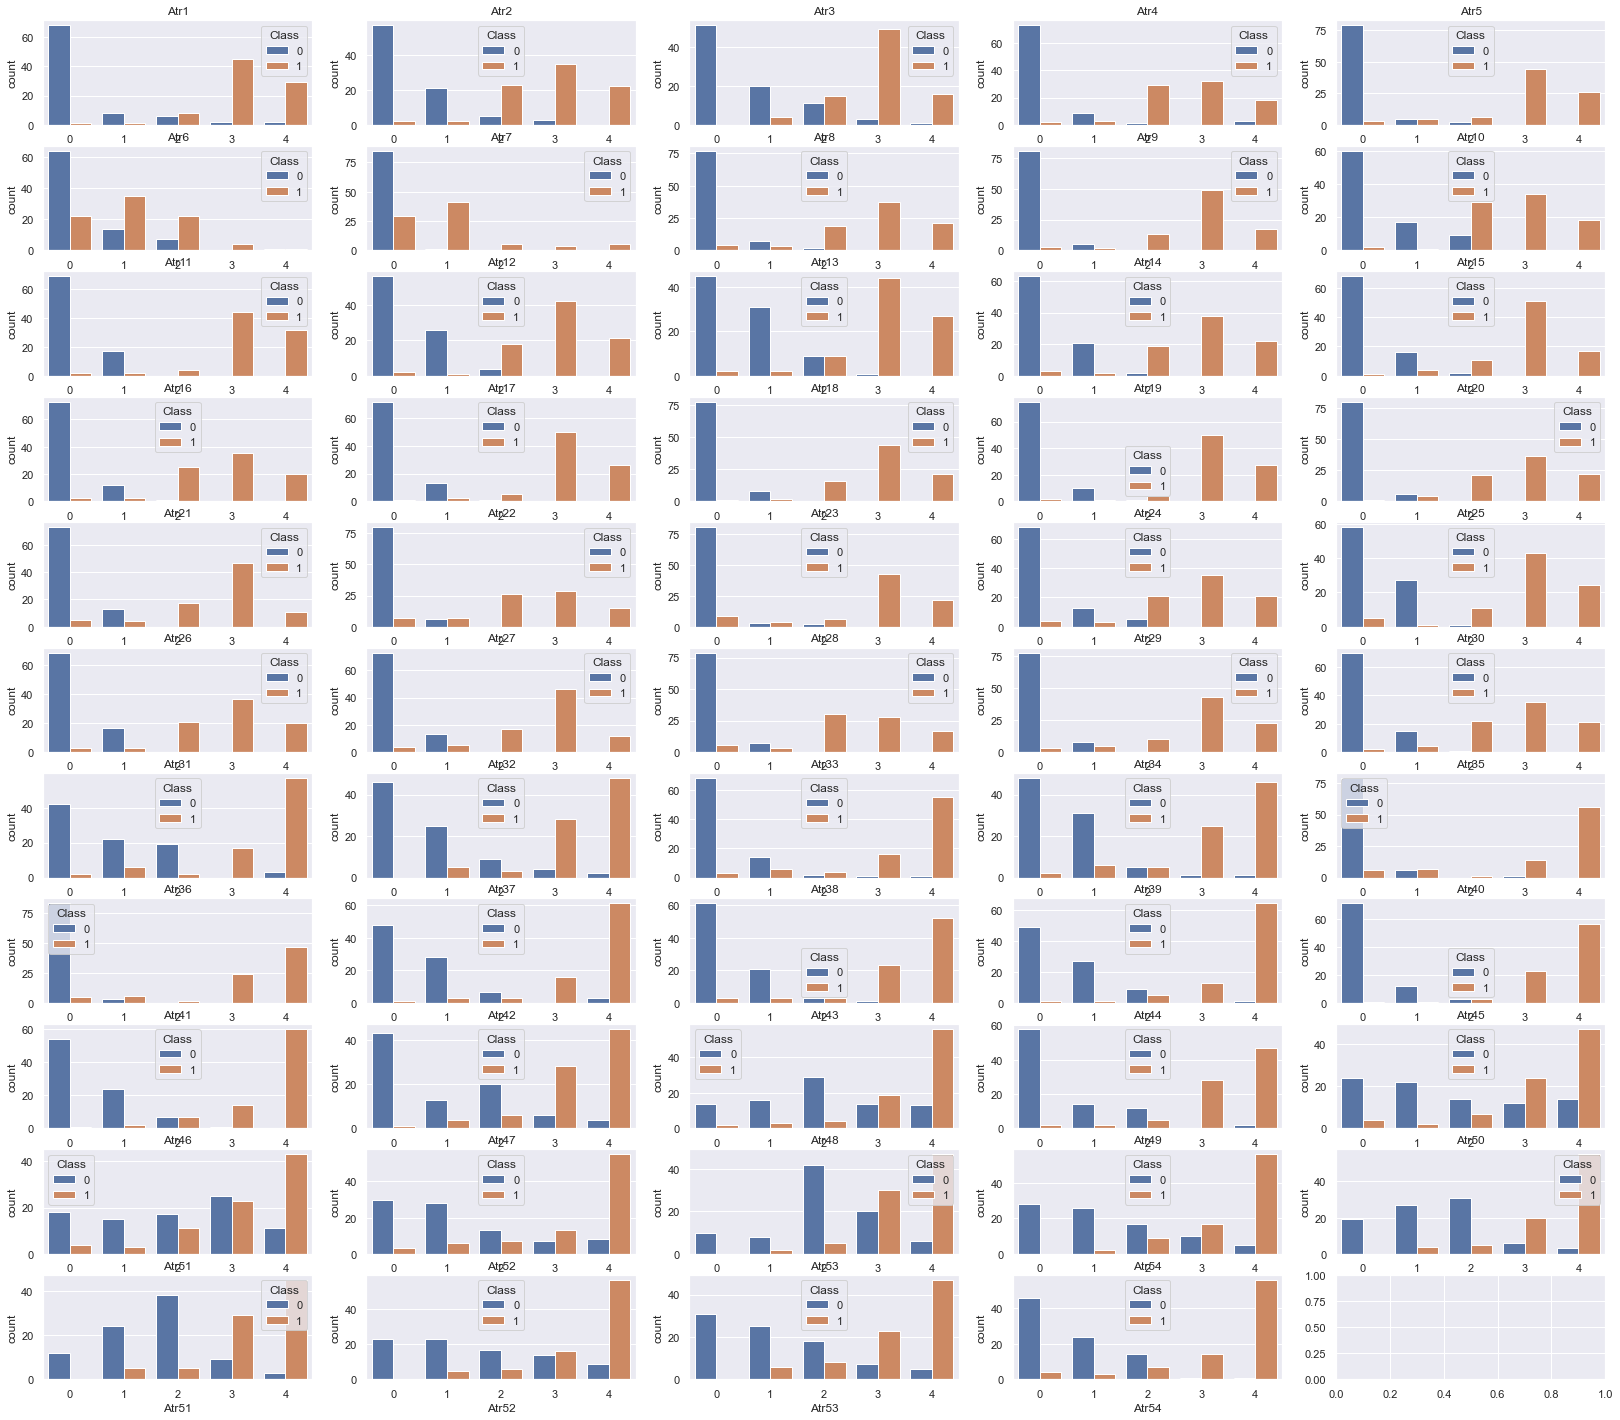

In [6]:
# data visualization by Divorce stuation
fig, axes = plt.subplots(11,5,figsize=(28,25))
s=0
for i in range(0,11):
    for j in range(0,5): 
        s+=1
        if s==55:
            break
        sns.countplot(ax = axes[i,j],x=f'Atr{s}',data=df,hue='Class')
        axes[i,j].set_title(f'Atr{s}')

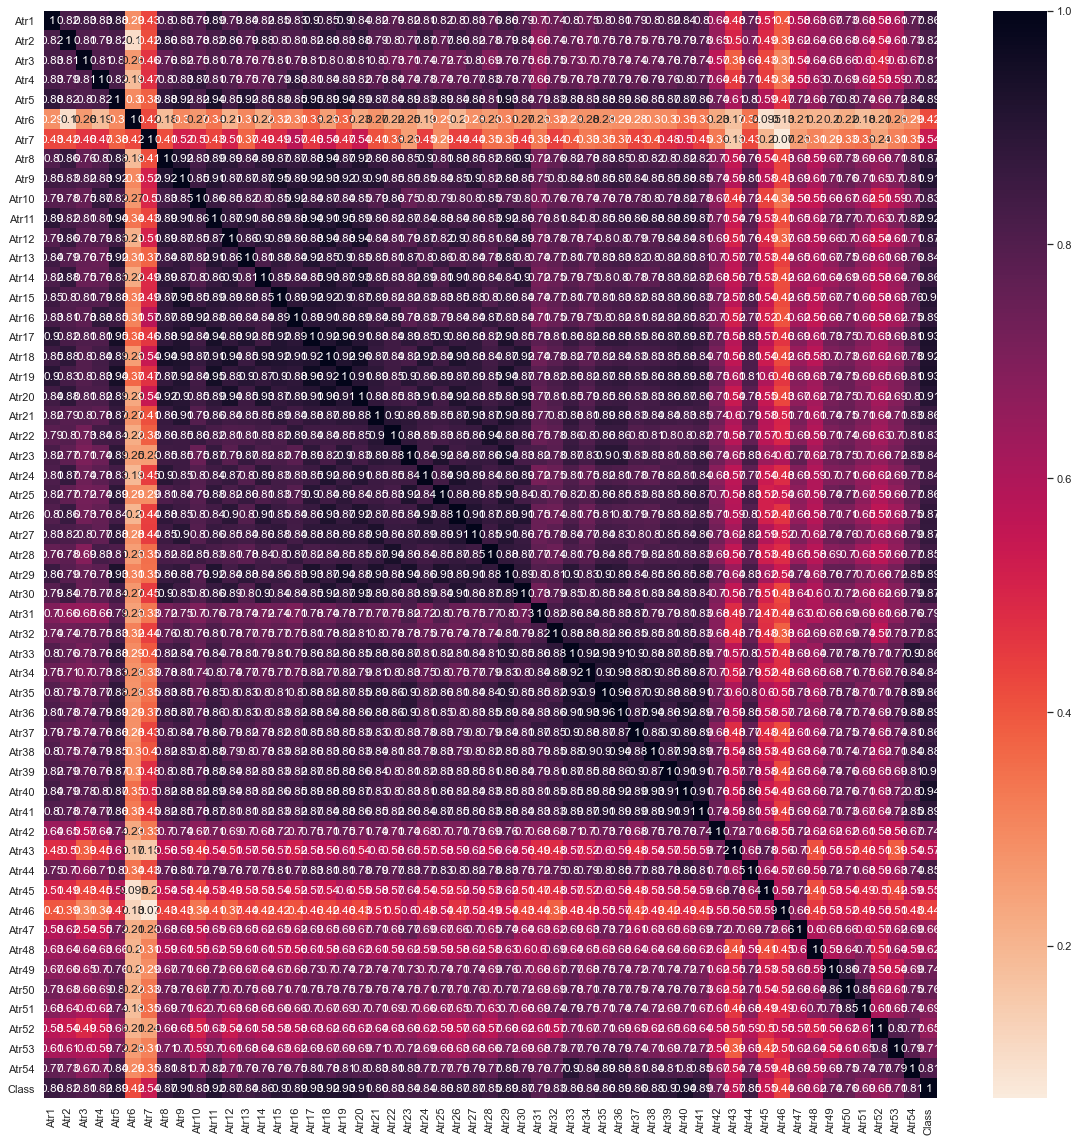

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='rocket_r')
plt.show()

From EDA we could observe data stat descriptive, feature distribution with its class,and correlation for each feature.

# Preprocess

In [8]:
# Define target variable
target = 'Class'

In [9]:
# View labels
df[target].value_counts(dropna=False)

0    86
1    84
Name: Class, dtype: int64

Participans:
- 86 (51%) were married couples [Class=0] 
- 84 (49%) were divorced [Class=1]

In [10]:
# Define Feature data
df_features = df.drop(target, axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df['Class'], test_size = 0.25, random_state = seed)

# Modeling

In [44]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [47]:
# Comparing model
for classifier, pl in zip((LogisticRegression,
                           SVC,                           
                           SGDClassifier,
                           DecisionTreeClassifier,
                           CategoricalNB,
                           KNeighborsClassifier,
                           RandomForestClassifier,
                           XGBClassifier,
                           ),
                          ('Logistic regression',
                           'Support Vector Machines',                                                      
                           'Stochastic Gradient Descent',
                           'Decision Tree',
                           'Categorical Naive Bayes',
                           'K-nearest neighbor Classifier',
                           'Random forest',
                           'XGBClassifier')):

    pipe = Pipeline([('clf', classifier())])    
    pipe.fit(X_train, y_train)
    print(pl)
    print("Training sample: ",pipe.score(X_train, y_train))
    print("Testing sample:  ",pipe.score(X_test, y_test),'\n')

Logistic regression
Training sample:  1.0
Testing sample:   1.0 

Support Vector Machines
Training sample:  0.9763779527559056
Testing sample:   1.0 

Stochastic Gradient Descent
Training sample:  1.0
Testing sample:   1.0 

Decision Tree
Training sample:  1.0
Testing sample:   1.0 

Categorical Naive Bayes
Training sample:  0.968503937007874
Testing sample:   1.0 

K-nearest neighbor Classifier
Training sample:  0.968503937007874
Testing sample:   1.0 

Random forest
Training sample:  1.0
Testing sample:   1.0 

[19:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
Training sample:  1.0
Testing sample:   1.0 



Select model XGBoost

In [13]:
X = X_train
y = y_train
# Run XGBoost Classification
# Set parameter grid
xgb_params = {'max_depth': [3, 5, 6, 8, 9, 10, 11], # Maximum depth of a tree
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], # Step size shrinkage used in update to prevents overfitting
              'subsample': np.arange(0.4, 1.0, 0.1),
              'colsample_bytree': np.arange(0.3, 1.0, 0.1), # Number of features supplied to a tree
              'colsample_bylevel': np.arange(0.3, 1.0, 0.1),
              'n_estimators': np.arange(100, 600, 100),
              'gamma': np.arange(0, 0.7, 0.1)}

In [14]:
# Create RandomizedSearchCV instance
xgb_grid = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic', 
                                                      tree_method="gpu_hist", # Use GPU
                                                      random_state=seed,
                                                      eval_metric='aucpr'), # AUC under PR curve
                              param_distributions=xgb_params, 
                              cv=5, 
                              verbose=2,
                              n_iter=60,
                              scoring='average_precision') 

In [15]:
# Run XGBoost grid search
xgb_grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.4, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.4; total time=   1.1s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.4, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.4, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.4, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.7000000000000002, gamma=0.4, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.3, colsample_b

[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.4; total time=   0.4s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.4; total time=   0.4s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.4; total time=   0.4s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.4; total time=   0.5s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.9000000000000001, gamma=0.6000000000000

[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.5, gamma=0.6000000000000001, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.5, gamma=0.6000000000000001, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.5, gamma=0.6000000000000001, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.5, gamma=0.6000000000000001, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7999999999999999; total time=   0.6s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000000000000002, gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.4s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000

[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8999999999999999; total time=   0.6s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.4, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=11, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=11, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=11, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=11

[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.6000000000000001, gamma=0.1, learning_r

[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.8000000000000003, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.8000000000000003, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bylevel=0.6000000000000001, colsample_bytree=0.8000000000000003, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.4; total time=   0.9s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.4; total time=   0.8s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.4; total time=   0.8s
[CV] END c

[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.6s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.6s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.5s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.5, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.5, max_depth=3, n_estima

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,...
                   param_distributions={'colsample_bylevel': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.3, 0.4,

In [16]:
xgb_grid.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 100,
 'max_depth': 11,
 'learning_rate': 0.2,
 'gamma': 0.30000000000000004,
 'colsample_bytree': 0.3,
 'colsample_bylevel': 0.3}

In [17]:
# Best Model
model = xgb_grid.best_estimator_

In [18]:
preds_proba = model.predict_proba(X_test)
preds_proba

array([[0.9864379 , 0.01356209],
       [0.00215495, 0.99784505],
       [0.9807476 , 0.01925241],
       [0.98423135, 0.01576866],
       [0.97762096, 0.02237905],
       [0.9856414 , 0.0143586 ],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.9914496 , 0.00855043],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.99416536, 0.00583465],
       [0.0028711 , 0.9971289 ],
       [0.00398439, 0.9960156 ],
       [0.9893307 , 0.0106693 ],
       [0.01723063, 0.98276937],
       [0.0028711 , 0.9971289 ],
       [0.00215495, 0.99784505],
       [0.0028711 , 0.9971289 ],
       [0.00215495, 0.99784505],
       [0.0028711 , 0.9971289 ],
       [0.99470925, 0.00529074],
       [0.9939417 , 0.00605825],
       [0.98287195, 0.01712807],
       [0.00588441, 0.9941156 ],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.00215495, 0.99784505],
       [0.

In [19]:
y_preds_proba = preds_proba[:,1]
y_preds_proba

array([0.01356209, 0.99784505, 0.01925241, 0.01576866, 0.02237905,
       0.0143586 , 0.99784505, 0.99784505, 0.00855043, 0.99784505,
       0.99784505, 0.99784505, 0.99784505, 0.00583465, 0.9971289 ,
       0.9960156 , 0.0106693 , 0.98276937, 0.9971289 , 0.99784505,
       0.9971289 , 0.99784505, 0.9971289 , 0.00529074, 0.00605825,
       0.01712807, 0.9941156 , 0.99784505, 0.99784505, 0.99784505,
       0.03168917, 0.02081523, 0.1409561 , 0.99784505, 0.0108465 ,
       0.02407334, 0.9971289 , 0.10401541, 0.99784505, 0.9200708 ,
       0.00540131, 0.01518241, 0.00956166], dtype=float32)

In [20]:
# Get predicted labels
preds = model.predict(X_test)
preds

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [21]:
# Define function to consolidate and display performance metrics
def gen_performance_metrics(y_true, y_preds, y_preds_proba, model_name, round_to=3):
    accuracy = round(metrics.accuracy_score(y_true, y_preds), round_to)
    f1_score = round(metrics.f1_score(y_true, y_preds), round_to)
    roc_auc = round(metrics.roc_auc_score(y_true, y_preds_proba), round_to)
    avg_precision = round(metrics.average_precision_score(y_true, y_preds_proba), round_to)

    df = pd.DataFrame([[model_name, accuracy, f1_score, roc_auc, avg_precision]], 
                        columns=['Model', 'Accuracy', 'F1 Score', 'ROC AUC Score', 'Average Precision'])
    
    display(df)
    display(metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_preds))

,Model,Accuracy,F1 Score,ROC AUC Score,Average Precision
0,XGBoost + RandomizedSearchCV,1.0,1.0,1.0,1.0


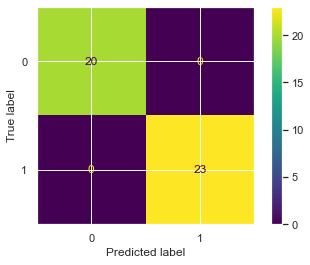

In [22]:
gen_performance_metrics(y_test, preds, y_preds_proba, 'XGBoost + RandomizedSearchCV')

# Final Model
Final model adalah model yang akan dideploy

In [23]:
# Set X and y datasets using all data
X = df.drop(columns=target)
y = df[target]

In [24]:
# Run Final Model
# Set parameter grid
xgb_params = {'max_depth': [3, 5, 6, 8, 9, 10, 11], # Maximum depth of a tree
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], # Step size shrinkage used in update to prevents overfitting
              'subsample': np.arange(0.4, 1.0, 0.1),
              'colsample_bytree': np.arange(0.3, 1.0, 0.1), # Number of features supplied to a tree
              'colsample_bylevel': np.arange(0.3, 1.0, 0.1),
              'n_estimators': np.arange(100, 600, 100),
              'gamma': np.arange(0, 0.7, 0.1)}
# Create RandomizedSearchCV instance
xgb_grid = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic', 
                                                      tree_method="gpu_hist", # Use GPU
                                                      random_state=seed,
                                                      eval_metric='aucpr'), # AUC under PR curve
                              param_distributions=xgb_params, 
                              cv=5, 
                              verbose=2,
                              n_iter=60,
                              scoring='average_precision') 
# Run XGBoost grid search
xgb_grid.fit(X, y)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.6000000000000001, gamma=0.6000000000000001, learning_rate=0.3, max_depth=3, n_estimators=200, su

[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.4, learning_rate=0.5, max_depth=3, n_estimators=200, subsample=0.4; total time=   0.2s
[CV] END colsample_bylevel=0.7000000000000002, colsample_bytree=0.3, gamma=0.4, learning_rate=0.5, max_depth=3, n_estima

[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.4; total time=   0.9s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.8000000000000003, gamma=0.6000000000000001, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.4; total time=   0.8s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9000000000000001, gamma=0.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9000000000000001, gamma=0.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9000000000000001, gamma=0.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.9000000000000001, gamma=0.0, learning_rate=0.01, max_depth=5, n_

[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.30000000000000004, learning_rate=0.5, max_depth=6, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bylevel=0.4, colsample_bytree=0.5, gamma=0.30000000000000004, learning_rate=0.5, max_depth=6, n_estimators=500, subsample=0.5; total time=   0.7s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8999999999999999; total time=   0.2s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8999999999999999; total time=   0.2s
[CV] END colsample_bylevel=0.9000000000000001, colsample_bytree=0.7000000000000002, gamma=0.6000000000000001, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8999999999999999; total time=   0.2s
[CV] END colsample_bylevel=0.90000000000000

[CV] END colsample_bylevel=0.3, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.4; total time=   0.6s
[CV] END colsample_bylevel=0.3, colsample_bytree=0.6000000000000001, gamma=0.30000000000000004, learning_rate=0.5, max_depth=10, n_estimators=500, subsample=0.4; total time=   0.6s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000000000000002, gamma=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.4; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000000000000002, gamma=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.4; total time=   0.3s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000000000000002, gamma=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.4; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7000000000000002, gamma=0.5, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.4; t

[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.5, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.9000000000000001, gamma=0.6000000000000001, learning_rate=0.5, max_depth=9, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END colsample_bylevel=0.5, colsample_

[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   0.9s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.9000000000000001, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8999999999999999; total time=   0.8s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.3, gamma=0.30000000000000004, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.6s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.3, gamma=0.30000000000000004, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_bylevel=0.8000000000000003, colsample_bytree=0.3, gamma=0.30000000000000004, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7999999999999999; total time=   0.7s
[CV] END colsample_byleve

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,...
                   param_distributions={'colsample_bylevel': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.3, 0.4,

In [25]:
# Final Model
final_model = xgb_grid.best_estimator_

In [26]:
xgb_grid.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.9000000000000001}

In [27]:
# Get prediction probabilities
pred_proba = final_model.predict_proba(X_test)
pred_proba

array([[0.9945434 , 0.00545662],
       [0.00362742, 0.9963726 ],
       [0.9860492 , 0.01395081],
       [0.9922085 , 0.00779152],
       [0.98378795, 0.01621206],
       [0.99303174, 0.00696826],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.99127877, 0.00872124],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.9945101 , 0.00548991],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.9949294 , 0.0050706 ],
       [0.008699  , 0.991301  ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.99528056, 0.00471946],
       [0.99528056, 0.00471946],
       [0.99029815, 0.00970184],
       [0.00670248, 0.9932975 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.00362742, 0.9963726 ],
       [0.

In [28]:
# Get prediction probabilities for label 1
y_preds_proba = preds_proba[:,1]
y_preds_proba

array([0.01356209, 0.99784505, 0.01925241, 0.01576866, 0.02237905,
       0.0143586 , 0.99784505, 0.99784505, 0.00855043, 0.99784505,
       0.99784505, 0.99784505, 0.99784505, 0.00583465, 0.9971289 ,
       0.9960156 , 0.0106693 , 0.98276937, 0.9971289 , 0.99784505,
       0.9971289 , 0.99784505, 0.9971289 , 0.00529074, 0.00605825,
       0.01712807, 0.9941156 , 0.99784505, 0.99784505, 0.99784505,
       0.03168917, 0.02081523, 0.1409561 , 0.99784505, 0.0108465 ,
       0.02407334, 0.9971289 , 0.10401541, 0.99784505, 0.9200708 ,
       0.00540131, 0.01518241, 0.00956166], dtype=float32)

In [29]:
# Get predicted labels
preds = final_model.predict(X_test)
preds

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# Evaluate Model

,Model,Accuracy,F1 Score,ROC AUC Score,Average Precision
0,XGBoost + RandomizedSearchCV,1.0,1.0,1.0,1.0


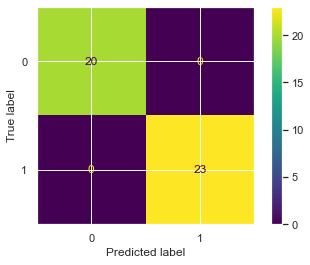

In [30]:
# Show performance assessment
gen_performance_metrics(y_test, preds, y_preds_proba, 'XGBoost + RandomizedSearchCV')

In [31]:
shap.initjs()

In [32]:
# Using a random sample of the dataframe for better time computation
X_sampled = X_test.sample(25, random_state=seed)

In [33]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_sampled)

In [34]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

- Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.
- The base value is the mean prediction of Y_test, in this case -0.001183.
- Atr40: has a positive impact on the divorce.

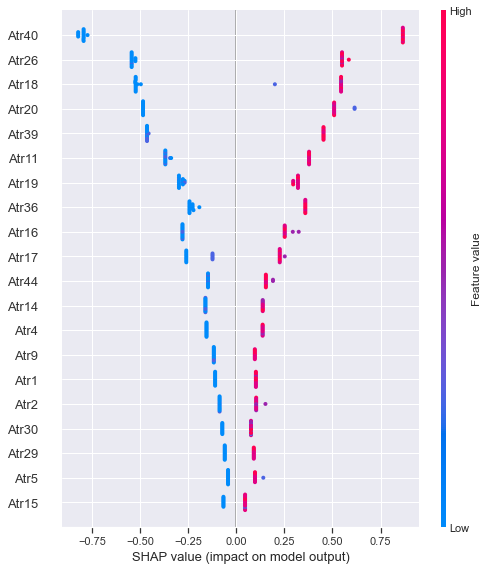

In [35]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled)

- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the “Atr40” has a high and positive impact on divorce. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. 

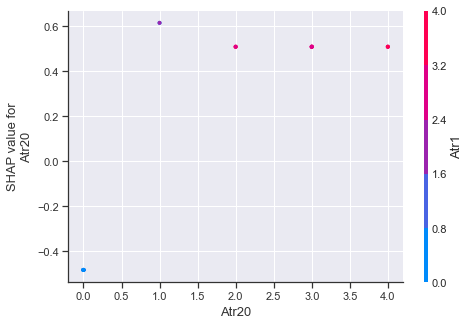

In [36]:
shap.dependence_plot('Atr20', shap_values, X_sampled)

The plot above shows Atr20 interact the most with Atr17

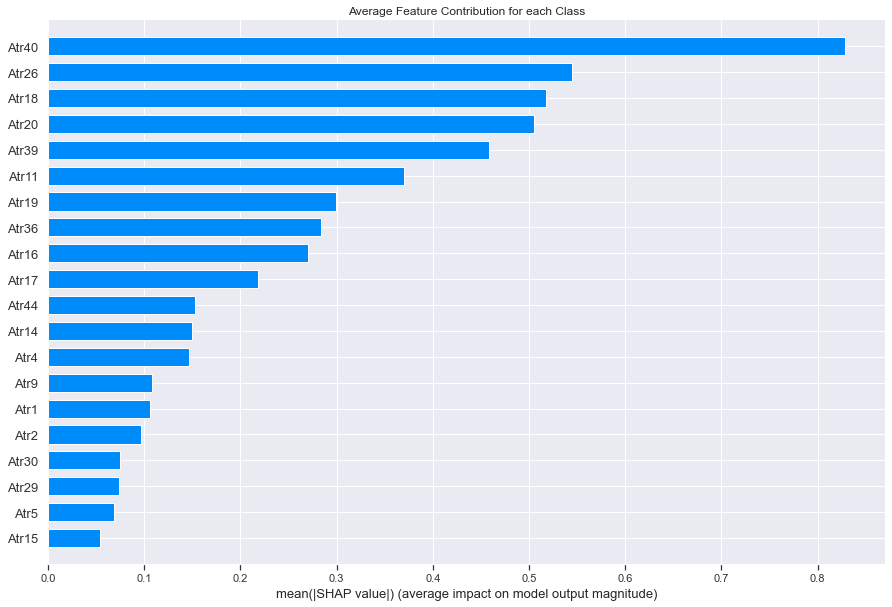

In [37]:
# Average feature contribution
plt.title('Average Feature Contribution for each Class')
shap.summary_plot(shap_values, X_sampled, plot_type="bar", plot_size = (15,10))

In [42]:
# Keep top Atr contribution numbers
question_list = [40,26,18,20,39,11,19,36,16,17,44,14,4,9,1,2,30,29,5,15]

In [43]:
# Format output
def get_reference(i, verbose = True):
    question = reference.loc[i,'description']
    if verbose:
        print('Q{}: {}'.format(i,question))
    else:
        return(question)
    
# Question outline of 20 most important features
print('List of question descending From the biggest impact(not causation):')
for question_index in question_list:
    get_reference(question_index)

List of Question Descending From The Biggest Impact(not causation):
Q40: We're just starting a discussion before I know what's going on.
Q26: I know my spouse's basic anxieties.
Q18: My spouse and I have similar ideas about how marriage should be
Q20: My spouse and I have similar values in trust.
Q39: Our discussions often occur suddenly.
Q11: I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
Q19: My spouse and I have similar ideas about how roles should be in marriage
Q36: I can be humiliating when we discussions.
Q16: We're compatible with my spouse about what love should be.
Q17: We share the same views about being happy in our life with my spouse
Q44: Sometimes I think it's good for me to leave home for a while.
Q14: Most of our goals for people (children, friends, etc.) are the same.
Q4: When I discuss with my spouse, to contact him will eventually work.
Q9: I enjoy traveling with my wife.
Q1: If one of us apolog

Conclusion:

Even thought list question we get not casusation, it could lead there by its impact. It's good to ask question. Because not only model need evaluation, our relationship too.



In [40]:
import joblib
# Save final model
joblib.dump(final_model,'./output/xgb_model.pkl')

['./output/xgb_model.pkl']

- Data source:

https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set

- Citation:

Yöntem, M. K. , Adem, K. , İlhan, T. & Kılıçarslan, S. (2019). DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS . Nevşehir Hacı Bektaş Veli Üniversitesi SBE Dergisi , 9 (1) , 259-273 . Retrieved from https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416 